# k-Means Clustering and Gaussian Mixture Models

a) Consider a 2-dimensional Gaussian Mixture of four Gaussians with $π_1 = π_2 = π_3 = π_4 = 0.25$, $μ_1 = (0,1), μ_2 = (1,0), μ_3 = (−1,0), μ_4 = (0,−1)$ and $Σ_1 = Σ_2 = Σ_3 = Σ_4 = I_2$ where $Σ_k$
is the covariance matrix of the $k^{th}$ Gaussian and $I_2$ is the 2×2 identity matrix. Sample 500
points from this distribution. Investigate how to sample from a Gaussian Mixture. Describe
how the sampling strategy you will use work. To sample vectors you can use libraries like
numpy. Plot the points with a scatter plot.

In [1]:
import numpy as np

For the 2-dimensional case where each $x^{(i)} = (x_1^{(i)}, x_2^{(i)})$ is a vector of two dimensions, the covariance matrix is given by:

$$
Σ = \begin{bmatrix}
\sigma_1^2 & \sigma_{12}^2 \\
\sigma_{21}^2 & \sigma_{2}^2
\end{bmatrix}
$$

The Gaussian is then given by:
$$
f(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^k |\boldsymbol{\Sigma}|}} \exp\left(-\frac{1}{2} (\mathbf{x}-\boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x}-\boldsymbol{\mu})\right)
$$ 
where $k$ is the number of dimensions.

In [2]:
# n-dimensional case
def gaussian(x, mu, cov, k):
    # k = dimensions
    return (1 / (np.sqrt((2 * np.pi) ** k * np.linalg.det(cov)))) * np.exp(-0.5 * (x - mu).T @ np.linalg.inv(cov) @ (x - mu))

def gaussian_mixture(x, pis, mus, covs, k):
    K = len(pis)
    def ind(x, pi, mu, cov):
        return pi * gaussian(x, mu, cov, k)
    
    return sum([ind(x, pis[i], mus[i], covs[i]) for i in range(K)])

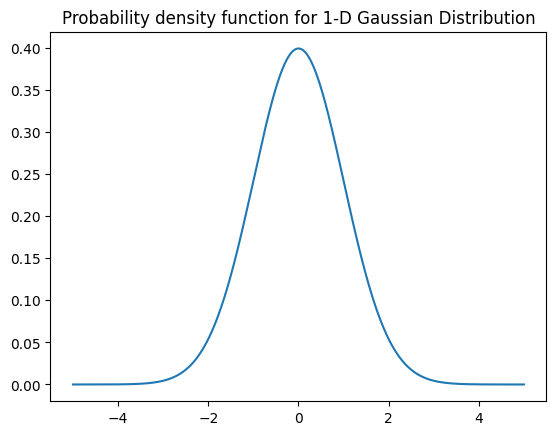

In [3]:
# plot gaussian for x = [-5, 5]
X = np.linspace(-5, 5, 1000)
y = [gaussian(np.array([x]), 
              np.array([0]), 
              np.array([[1]]), 
              np.array([1])) for x in X]

# covariance matrix for 1-d: [[sigma^2]]
import matplotlib.pyplot as plt
plt.plot(X, y)
plt.title("Probability density function for 1-D Gaussian Distribution")
plt.show()

In [4]:
pis = np.array([[.25], [.25], [.25], [.25]])
mus = np.array([[0, 1], [1, 0], [-1, 0], [0, -1]])
covs = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]])

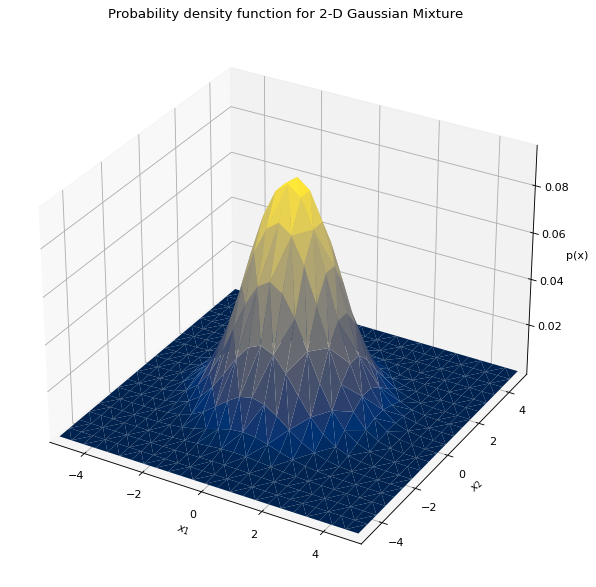

In [5]:
# plot 500 points from gaussian mixture
X = np.mgrid[-5:5:25j, -5:5:20j].reshape(2, -1).T
z = [gaussian_mixture(np.asarray(x),
                        pis,
                        mus,
                        covs,
                        np.array([2])) for x in X]
x = X[:, 0]
y = X[:, 1]
z = np.asarray(z).reshape(-1)

# create 3d plot
fig = plt.figure(figsize=(12, 9), dpi=80)
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x, y, z, cmap='cividis', edgecolor='none')
ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
ax.set_zlabel('p(x)')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title("Probability density function for 2-D Gaussian Mixture")
plt.show()              

In [6]:
# get 200 by 200 grid
X = np.mgrid[-5:5:200j, -5:5:200j].reshape(2, -1).T
z = [gaussian_mixture(np.asarray(x),
                        pis,
                        mus,
                        covs,
                        np.array([2])) for x in X]
x = X[:, 0]
y = X[:, 1]
z = np.asarray(z).reshape(-1)

points = X
probabilities = z

points.shape, probabilities.shape

((40000, 2), (40000,))

In [7]:
# convert points into int categories
categories = np.array(range(len(points)))
# normalize probabilities
probabilities = probabilities / sum(probabilities)
# sample 500 points using points and probabilities
samples = np.random.choice(categories, 500, p=probabilities)
samples = [points[i] for i in samples]

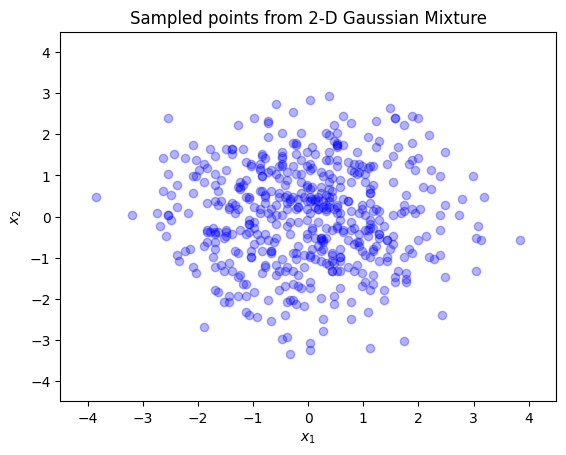

In [8]:
# plot the points with scatter plot
x = [s[0] for s in samples]
y = [s[1] for s in samples]
plt.scatter(x, y, c='blue', alpha=0.3)
# Set the left and right boundaries
plt.xlim(-4.5, 4.5)
plt.ylim(-4.5, 4.5) 

# Customize the plot
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.title("Sampled points from 2-D Gaussian Mixture")
plt.show()

* Firstly, implemented a `gaussian` function that takes n-dimensional input `x` with mean and covariance matrix as input and returns the value of the probability density function of the gaussian distribution. Tested the function by sampling 1000 points between -5 and 5 and plotting the result.
* Implemented a `gaussian_mixture` function that takes n-dimensional input `x` with means, covariance matrices and weights as input and returns the value of the probability density function of the gaussian mixture distribution.
* My sampling strategy is as follows: First I've used the `numpy` function `mgrid` in order to create 500 points between $[-5, -5]$ and $[5, 5]$. Then, I've used the `gaussian_mixture` function to calculate the probability density function of the gaussian mixture distribution for each point. As a result, I had two lists consisting of points $x$ and corresponding probability values $p(x)$. Finally, I've used the `numpy` function `random.choice` to sample 500 points from the distribution. To do so, I've normalized the probability values and used the indices of points.

b) Implement the k-means algorithm from scratch to cluster the dataset you created in (a). Plot
the cluster assignments. Is the k-means able to correctly cluster the different components of
the mixture? Note that you cannot use any direct implementation of the k-means algorithm,
but you can use linear algebra libraries like NumPy.

* KMeans formulation: We are trying to find the cluster centers $c_j$ and the cluster assignments $m_{i,j}$ that minimize the following objective function:
\begin{equation*}
\argmin_{\substack{c_j, m_{i,j}}} \sum_{j=1}^K \sum_{i=1}^n m_{i,j} \lVert x_i - c_j \rVert^2
\end{equation*}
such that
\begin{equation*}
m_{i,j} = \begin{cases}
1 & \text{if } j = \argmin_{j \in [1 \;... \;K]} \lVert x_i - c_{j} \rVert^2 \\
0 & \text{otherwise} \end{cases}
\end{equation*}

\begin{equation*}
\sum_{j=1}^K m_{i,j} = 1 \;\; \text{for all } i \in \{1, ..., n\}
\end{equation*}

\begin{equation*}
c_j = \frac{\sum_{i=1}^n m_{i,j} x_i}{\sum_{i=1}^n m_{i,j}} \;\; \text{for all } j \in \{1, ..., K\}
\end{equation*}

* Implemented a `kmeans` function that takes the data points `X` and the number of clusters `K` as input and returns the cluster centers and the cluster assignments.

In [9]:
def random_centroids(X, k):
    indices = np.array(range(len(X)))
    return [X[idx] for idx in np.random.choice(indices, size = k)]

# KMeans for 2D data
class KMeans:
    def __init__(self, n_clusters, initial_selection):
        self.n_clusters = n_clusters
        self.m = None
        self.c = None
        self._is_fitted = False
        self.initial_selection = initial_selection

    def fit(self, X: np.ndarray):
        # X is a 2D array
        
        # m[i][j] = 1 if point i belongs to cluster j
        # m[i][j] = 0 otherwise

        # c[j] = centroid of cluster j

        # initialize m and c
        self.m = np.zeros((len(X), self.n_clusters))
        # self.c = np.zeros((self.n_clusters, 2))

        # randomly select K points as the initial centroids
        self.c = self.initial_selection(X, self.n_clusters)
        self._is_fitted = True

        N = X.shape[0]
        K = len(self.c)
        change = True
        while(change):
            change = False
            # assign point to the closest centroid
            for x_idx, x in enumerate(X):
                min_idx = np.argmin([np.linalg.norm(x - c) ** 2 for c in self.c])
                
                if self.m[x_idx][min_idx] != 1:
                    # update the matrix
                    self.m[x_idx] = np.zeros(self.n_clusters)
                    self.m[x_idx][min_idx] = 1

            # recalculate the centroids
            for j in range(K):
                prev = self.c[j].copy()
                
                nominator_0 = np.array(sum([X[i][0] * self.m[i][j] for i in range(N)]))
                nominator_1 = np.array(sum([X[i][1] * self.m[i][j] for i in range(N)]))
                denominator = np.array(sum([self.m[i][j] for i in range(N)]))

                self.c[j][0] = nominator_0 / denominator
                self.c[j][1] = nominator_1 / denominator
                curr = self.c[j]
                if(np.any(prev != curr)):
                    change = True


    def predict(self, X: np.ndarray):
        assert self._is_fitted, "Model is not fitted yet"
        return np.array([np.argmin([np.linalg.norm(x - c) ** 2 for c in self.c]) for x in X])

In [10]:
kmeans = KMeans(n_clusters=4, initial_selection = random_centroids)
kmeans.fit(np.array(samples))

In [11]:
# predict the points in the sample set
predictions = kmeans.predict(np.array(samples))

# get number of points in each cluster
cluster_sizes = [sum(predictions == i) for i in range(kmeans.n_clusters)]
cluster_sizes

[132, 98, 144, 126]

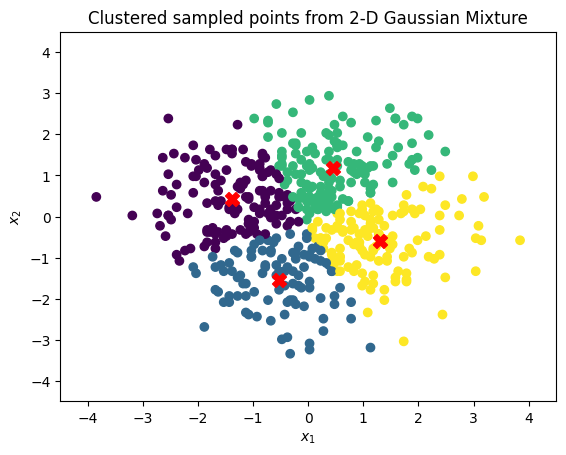

In [12]:
def plot_clusters(samples, kmeans):
    predictions = kmeans.predict(np.array(samples))
    
    # plot the points with clusters
    x = [s[0] for s in samples]
    y = [s[1] for s in samples]
    plt.scatter(x, y, c=predictions)
    # Set the left and right boundaries
    plt.xlim(-4.5, 4.5)
    plt.ylim(-4.5, 4.5)

    # Customize the plot
    plt.xlabel('$x_{1}$')
    plt.ylabel('$x_{2}$')
    # add clusters
    for i in range(len(kmeans.c)):
        # add cluster centroid with the same color as the cluster
        if(cluster_sizes[i] > 0):
            plt.scatter(kmeans.c[i][0], kmeans.c[i][1], c='red', marker='X', s=100)

    plt.title("Clustered sampled points from 2-D Gaussian Mixture")
    plt.show()

plot_clusters(samples, kmeans)

* As it can be seen from the plot, the k-means algorithm is able to correctly cluster the different components of the mixture. For $K = 4$, the algorithm divides the sample set into 4 different parts where each centroid is marked with a red cross.
* Extra: To deal with the Initial Centroid Problem, we can use `kmeans++` technique developed by Arthur, D. et al. [\[1\]](https://theory.stanford.edu/~sergei/papers/kMeansPP-soda.pdf). The idea is to initialize the centroids by choosing the first centroid randomly and then choosing the next centroid such that the probability of choosing a point as centroid is directly proportional to its distance from the nearest, previously chosen centroid [\[2\]](https://www.geeksforgeeks.org/ml-k-means-algorithm/). This way, we can avoid the problem of choosing a centroid that is too close to another centroid.


1. Arthur, D., & Vassilvitskii, S. (2007). k-means++: The advantages of careful seeding. Proceedings of the eighteenth annual ACM-SIAM symposium on discrete algorithms, 1027-1035.

In [13]:
def kmeans_plus_plus(X, k):
    centroids = [X[np.random.choice(len(X))]]
    for _ in range(k - 1):
        distances = [min([np.linalg.norm(x - c) ** 2 for c in centroids]) for x in X] # find the distance between each point and the closest centroid
        centroids.append(X[np.random.choice(len(X), p = distances / sum(distances))])
    return centroids

In [14]:
kmeans_ = KMeans(n_clusters=4, initial_selection = kmeans_plus_plus)
kmeans_.fit(np.array(samples))

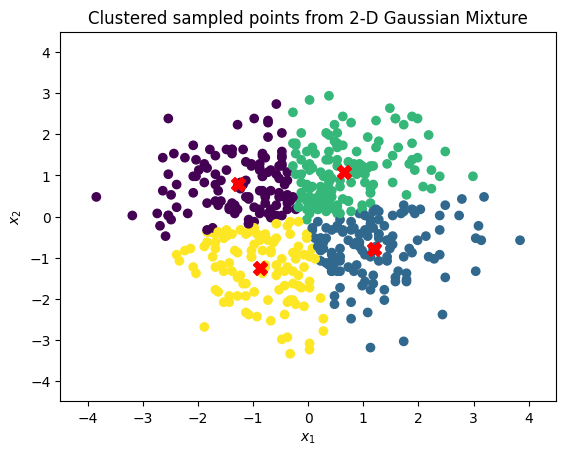

In [15]:
plot_clusters(samples, kmeans_)